In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("RAW_QualtricsExport.xlsx", header=[0, 1])

c:\Users\user\Desktop\DB\edm\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [22]:
# print all headers
for id, name in enumerate(df.columns):
    print(id, name)


0 ('StartDate', 'Start Date')
1 ('EndDate', 'End Date')
2 ('Status', 'Response Type')
3 ('IPAddress', 'IP Address')
4 ('Progress', 'Progress')
5 ('Duration (in seconds)', 'Duration (in seconds)')
6 ('Finished', 'Finished')
7 ('RecordedDate', 'Recorded Date')
8 ('ResponseId', 'Response ID')
9 ('RecipientLastName', 'Recipient Last Name')
10 ('RecipientFirstName', 'Recipient First Name')
11 ('RecipientEmail', 'Recipient Email')
12 ('ExternalReference', 'External Data Reference')
13 ('LocationLatitude', 'Location Latitude')
14 ('LocationLongitude', 'Location Longitude')
15 ('DistributionChannel', 'Distribution Channel')
16 ('UserLanguage', 'User Language')
17 ('Q3_1', 'You need to agree with each statement to participate. If you do not consent, please close this tab. - 1. I confirm that I have read and understood the Information Sheet for the above study.')
18 ('Q3_2', 'You need to agree with each statement to participate. If you do not consent, please close this tab. - 2. I understand tha

In [23]:
# drop unnecessary columns
df = df.drop(
    df.columns[
        [
            0,  # Start Date
            1,  # End Date
            2,  # Response Type
            3,  # IPAddress
            4,  # Progress
            5,  # Duration (in seconds)
            6,  # Finished
            7,  # RecordedDate
            8,  # ResponseId
            9,  # RecipientLastName
            10,  # RecipientFirstName
            11,  # RecipientEmail
            12,  # ExternalReference
            13,  # LocationLatitude
            14,  # LocationLongitude
            15,  # DistributionChannel
            16,  # UserLanguage
            17,  # agreements
            18,  # agreements
            19,  # agreements
            20,  # agreements
            21,  # agreements
            22,  # agreements
            23,  # agreements
            24,  # agreements
            25,  # info about the survey
            26,  # Prolific ID
            29,  # other
            32,  # other
            34,  # other
            36,  # other
            40,  # info about the survey
            45,  # attention check
            71,  # attention check
            75,  # feedback
        ]
    ],
    axis=1,
)

# the last 9 rows are not completed
df = df.drop(df.tail(9).index)

In [24]:
# remaining columns
for id, name in enumerate(df.columns):
	print(id, name)

0 ('Q6', 'In the last semester I attended my education:')
1 ('Q7', 'What is your gender? - Selected Choice')
2 ('Q8', 'List of Countries')
3 ('Q9', 'In which country are you performing your education? - Selected Choice')
4 ('Q10', 'In which domain is the class you spent more time on (e.g., lecture hours, homework, exercises, course project, individual study time)?\nTime spent is an individual assessment, do not refer on the indication of your Syllabus but on the actual time YOU spent on the subject.\n\n Remember to think to this class when answering the the survey. - Selected Choice')
5 ('Q11', 'Level of education. I am attending a: - Selected Choice')
6 ('Q34', 'I had always a good and reliable internet connection for my online education.')
7 ('Q50', 'For the course, we also worked in teams.')
8 ('Q52', 'If I could choose, I would conclude my entire education with online/remote teaching.')
9 ('Q14', 'I would recommend this instructor to other students.')
10 ('Q15', 'I would recommend 

In [25]:
# calcute number of nan of each column
print(df.isnull().sum().values)
# drop rows containing nan (since it's not a lot)
df = df.dropna()

[0 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2]


In [26]:
# mapping categorical values to numerical values
df_mapped = df.copy()
common_value_map_1 = {"Disagree": 0.0, "Agree": 1}
common_value_map_2 = {
    "Strongly disagree": 0,
    "Disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Agree": 5,
    "Strongly agree": 6,
}
value_maps = []
for id, name in enumerate(df.columns):
    value_maps.append({})
    # print(id, df[name].unique())
    if id in [6, 7, 8]:
        value_maps[id] = common_value_map_1
    elif id >= 9:
        value_maps[id] = common_value_map_2
        df[name] = df[name].map(value_maps[id])
    else:
        for i, value in enumerate(df[name].unique()):
            value_maps[id][value] = i
    df_mapped[name] = df_mapped[name].map(value_maps[id])
df.to_csv("cleaned.csv", index=False)

) missing from current font.\venv\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


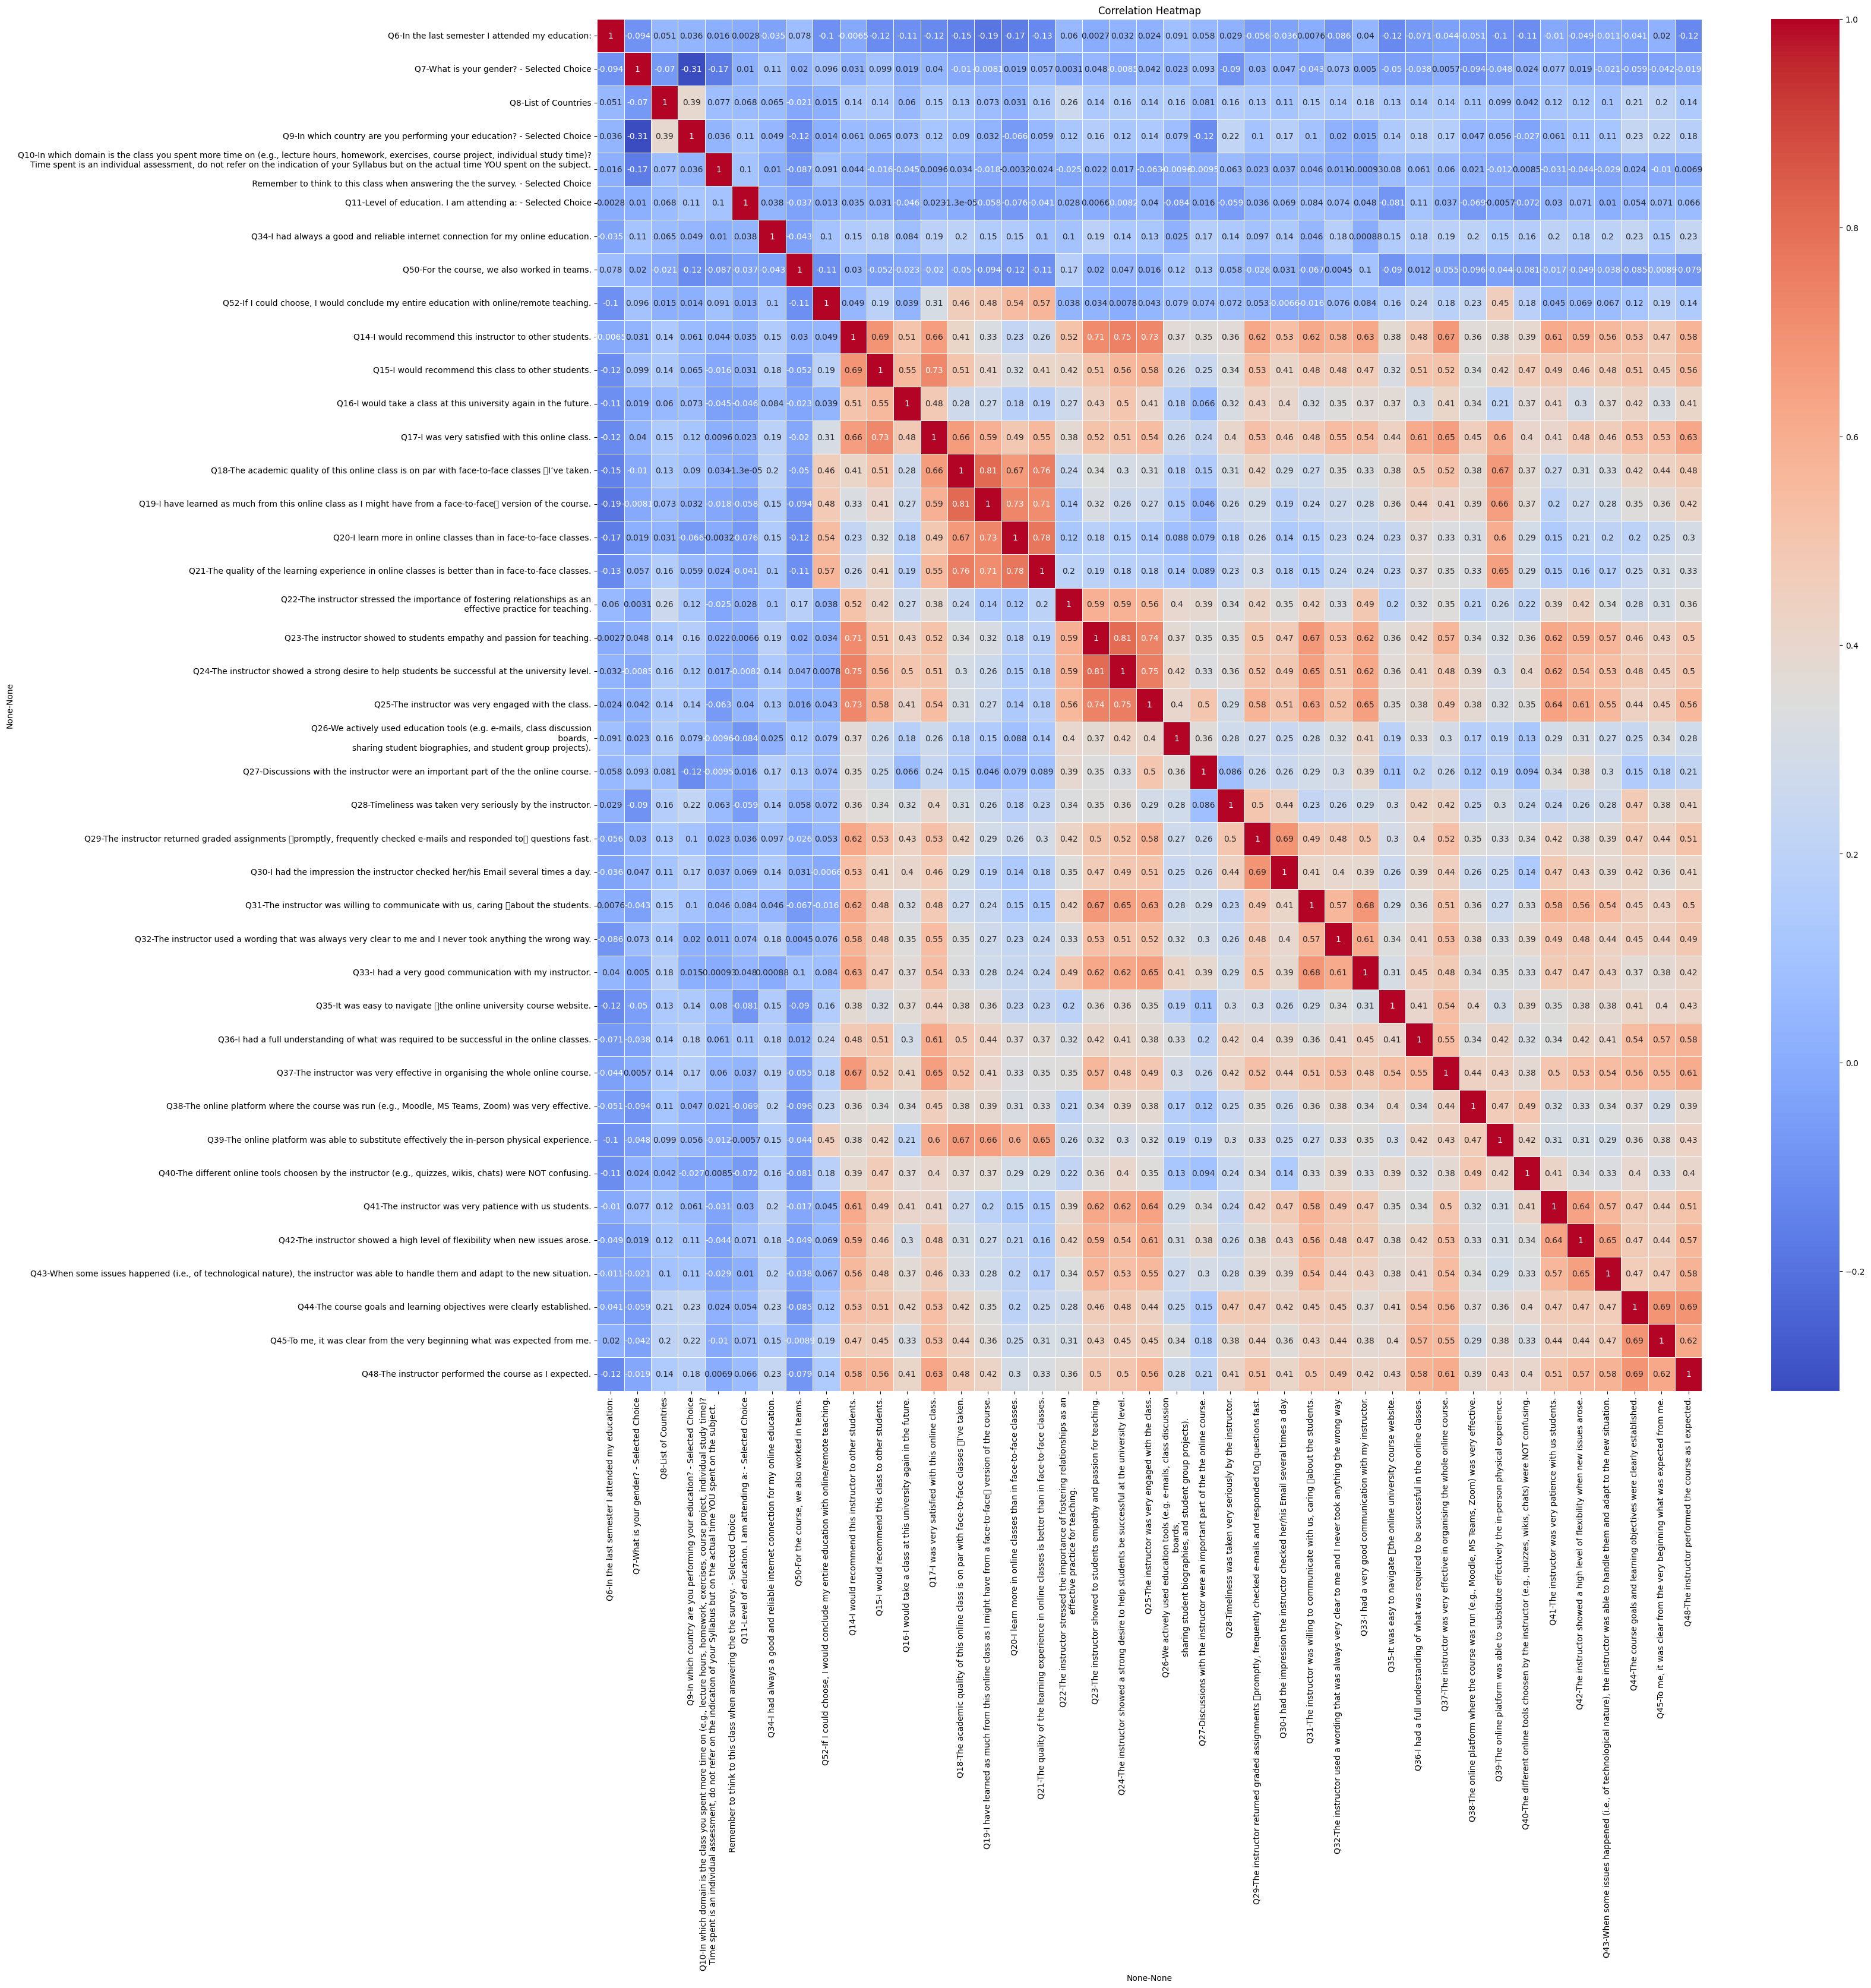

In [27]:
# correlation heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df_mapped.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Axes: ylabel='count'>

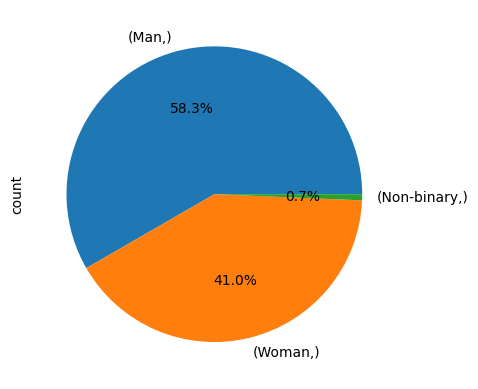

In [28]:
# pie chart
df["Q7"].value_counts().plot(kind="pie", autopct="%1.1f%%")

<Axes: >

) missing from current font.\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


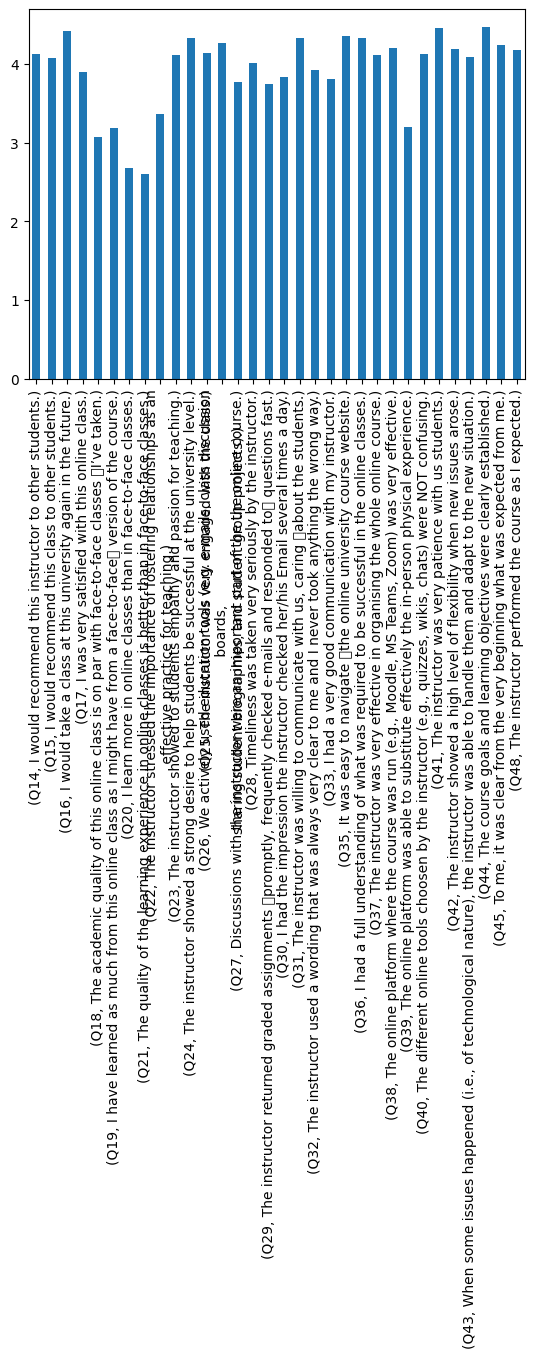

In [34]:

df[df.columns[9:]].mean().plot(kind="bar")

In [36]:
# pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# pca
pca = PCA(n_components=2)
# standardize
x = StandardScaler().fit_transform(df_mapped)
# fit
principalComponents = pca.fit_transform(x)
# create dataframe
principalDf = pd.DataFrame(
	data=principalComponents, columns=["principal component 1", "principal component 2"]
)
# plot
plt.figure(figsize=(10, 10))
plt.show()

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>